# Ordinary Differential Equations

Differential equations are systems whose variables change with time. Mathematically, differentials are functions that contain derivatives of itself. When these systems are integrated, they provide analytical  functions that are dependent with time. Integration of differentials can be performed by calculus, or numerically. 

INSERT image here)

Ordinary differential equations (ODES) are equations that have a single dependent variables. Partial differential equations are equations that are dependent on 2 or more variables. Furthermore, the order of a differential equation is characterized by the highest derivative of an independent variable. 

Biological cell growth is a first order differential that describes the exponential increase of biomass concentration  (X) accumulation over time (assuming $ \mu _g  $  is constant ). 


$$ \frac{dX}{dt} = \mu_g X  $$

The Navier-Stokes equations in contrast, are 2nd order partial differentials describing particle position of a fluid as a function of the derivatives of speed, sheer, time and, pressure. 

$$ \rho \big( \frac{du}{dt} +u \frac{du}{dx} + v \frac{dv}{dy} + w \frac{dw}{dz} \big) = - \frac{dP}{dx} + \mu \big( \frac{d^2u}{dx^2} + \frac{d^2v}{dy^2} +  \frac{d^2w}{dz^2}    \big)  $$ 

The scope of this tutorial focuses on  first order, ordinary differential equations. 



When ODE's are solved, some have an analytical solution. For example, solving the Biomass growth equation gives this analytical solution.

$$ X = X_0 e^{\mu _g (t-t_0)} $$

Where $ X_0 $  and $ t_0 $  are initial conditions of the cell concentration and lag time.  

If you have worked with numerical methods in Excel, you may have come across solving differentials by using this form:


$$  \frac{dX}{dt} = \mu_g X$$

$$ \frac{X_{i+1}-X_i}{t_{i+1} - t{i}} = \mu_g X_i  $$

$$ X_{i+1}  =   X_{i}+ \mu _g X_i  \Delta t $$ 


This form of discretizing is the basis of numerical methods for ODE's and are called *single step* or *Runge Kutta* methods.

$$ Value_{new} = Value_{old} + slope*stepsize  $$  

$$ y_{i+1}  = y_i + \phi h$$

Well studied methods have minimized the error in the phi term to provide highly accurate ODE integrators. 

## Comparing Analytical solutions  with Numerical Solver

Be



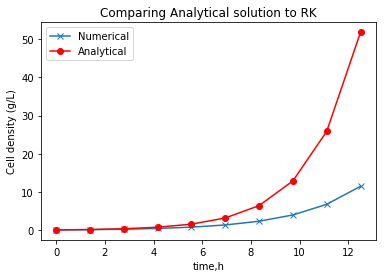

In [2]:


import matplotlib.pyplot as plt 
import numpy as np
from scipy import integrate
%matplotlib inline

y0 = 0.1 
ug = 0.5 
tot = 12.5 
stepsize = 10


## using simple RK method
t = np.linspace(0,tot,stepsize) # creating a time vector
dt = t[1]-t[0] # establishing dt
y = np.zeros(len(t)) # creating a Cell density vector 
y[0] = y0

for i in range (1, len(t)):
    y[i] = y[i-1] + ug*y[i-1]*dt

## using analytical solution 
    X = np.exp(ug*(t))*y0
    
# plotting both in comparaison
plt.xlabel('time,h')
plt.ylabel('Cell density (g/L)')
plt.title ('Comparing Analytical solution to RK')
plt.plot(t,y,'-x',label='Numerical')
plt.plot(t,X,'-or',label = 'Analytical')
plt.legend()

## Example: 

Suppose Ace Chemical Engineering (ACE) has a 500 L tank that has 50 g/L of NaCl. An inlet stream flows at 10 L/min and has a concentration of 2.5 g/L. ACE wants to empty the tank at 15L/min while keeping the inlet flow rate constant. How many minutes will it take for the tank to reach 30 g/L? 


The concentration balance with no reaction is written out as:

$$  V\frac{dC}{dt} = Q_{in}C_{in} - Q_{out}C_{out} $$  Where $ C_{out}  = C $ 

The known values are substituted in and the formula is rearranged to isolate $\frac{dC}{dt} $

$$ \frac{dC}{dt} = \frac{10*2.5}{500} -\frac{15*C}{500}$$

This can now be put into OdeInt to observe the curve.

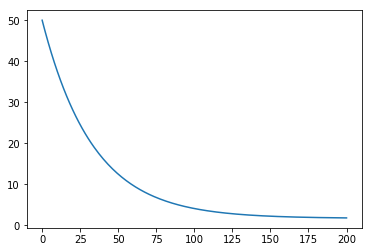

In [7]:

C0 = 50 # g/L
t = np.linspace(0,200,200) # minutes 
dt= t[1]-t[0]

def dcdt(C,t):
    return (10/500*2.5-15/500*C)

sol  = integrate.odeint(dcdt,C0,t)


# print(t)
plt.plot(t,sol)

In [35]:


#rudimentarily, the time that it will take to reach 40 g/L is presented here.

h = np.where((sol>=39) & (sol<=40))
print (h)
print(sol[h])




(array([8]), array([0]))
[ 39.64118714]


Therefore, it will take approximately 8 minutes for the tank to reach a concentration of 40 g/L

In [80]:
integrate.odeint?

In [124]:
t = np.linspace(0,2,200)
v0 =  8 
alpha = 9*np.pi/180
y0 = (0,1,v0*np.cos(alpha),v0*np.sin(alpha))

In [125]:
sol = integrate.odeint(projectile_motion,y0,t)

In [126]:
# plt.plot (t,sol[:,3])


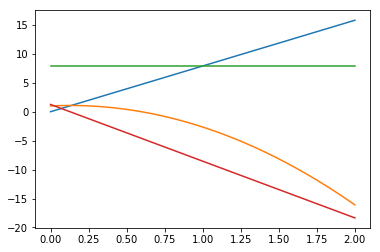

In [127]:
plt.plot(t,sol)

In [115]:
np.cos(alpha)

6.123233995736766e-17